## Arrays

As we saw above, generalizing the way we subset vectors to subsetting matrices was quite easy -- we just subset our matrices by doing what we did with vectors, but with two terms in our square brackets separated by a comma (e.g. `[1, 1]` instead of just `[1]`). 

But guess what? Just as it was easy to generalize from one dimension to two, it turns out that we can also generalize from two dimensions to N dimensions the same way! In fact, rather than thinking of vectors and matrices as different things, we can think of them as special cases (the case of N=1 and N=2) of a more general data structure: **Arrays**. 

Arrays are collections of data of the same type with a regular structure organized into N dimensions (which is why they are sometimes referred to as **ND-Arrays** instead of just arrays). 

When N=1, an array is the equivalent of a vector:

In [1]:
import numpy as np

np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

And when N=2, an array is just a matrix:

In [2]:
np.arange(20).reshape(5, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

But when N > 2, things start to get a little harder to visualize, but also a lot more powerful. 

![nd array examples](images/arrays_w_axis_and_indexing_4d.png)

## Three Dimensional Arrays

*But WHY*, I hear you ask, *would I ever want more than two dimensions?!* 

While a large portion of data science is done with two-dimensional data—since it can be used to represent both tabular data and also images—we live in a world with three spatial dimensions. As a result, many data science applications require data about three-dimensional objects, otherwise known as *volumetric data*.

To illustrate, consider the case of an MRI. While we've all seen two-dimensional MRI images, but a real MRI scan consists of a *series* of these two-dimensional slices stacked on top of one another to form a three-dimensional picture of patients. And this data can very naturally be represented in a three-dimensional numpy array!

To illustrate, consider the following MRI scan which has been saved as a `.npy` file (a format created by numpy for storing arrays of arbitrary shape):


In [4]:
import numpy as np

mri = np.load("../../../Example_Data/mri/mri_neck_vertical_slices.npy")
type(mri)

numpy.ndarray

In [4]:
mri.shape

(15, 512, 512)

As we can see, this MRI is represented by a three-dimensional array. More specifically, it consists of 15 stacked images, each of which is 512 x 512 pixels. And since this is just a set of stacked images, we can easily pull out one of these slices and visualize it:

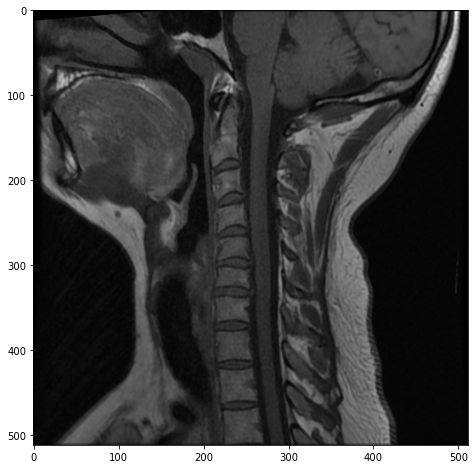

In [5]:
# Load a plotting library.
# We'll talk more about plotting in a
# later class!

from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(mri[7, :, :], cmap="gray", aspect="equal")

Voila! Here we can clearly see a patient's neck from a side view with the spinal cord running up through to the base of the patient's brain in the top right, and the patient's front teeth on the left. 

This is the 7th slice of 15, so it's showing us the approximate middle of the patient's neck. But if we wanted to move outward from the center of the patient's body, we could pick a slice closer to 0 or 14:

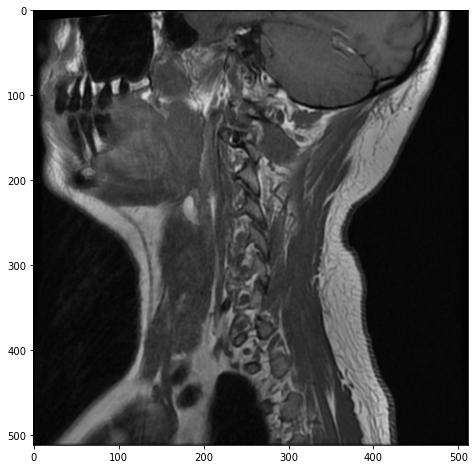

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(mri[14, :, :], cmap="gray")

Here, as we move out to the side of the patient's neck, we can see the MRI catching their side teeth in the top left, as well as more of the patient's neck muscles.

Finally, because this data is three-dimensional, we also have the option of cutting our own slices along a different axis. In the images above, we've specified a specific value for the first dimension of our array and plotted the second and third dimensions along the x and y-axes of our image. This has given us vertical slices of the patient's neck.

But if, instead, we fix a value of the *second* dimension, we can actually get a *horizontal* slice of the patient's neck. Now, because we only have 15 slices along the first dimension of our array, the resolution along this axis is not nearly as good (a full MRI study includes taking detailed slices along all axes, and CT scans can be used to generate volumetric data with consistent resolution along all axes), but it does illustrate how working with volumetric data allows us to really explore three-dimensional objects:

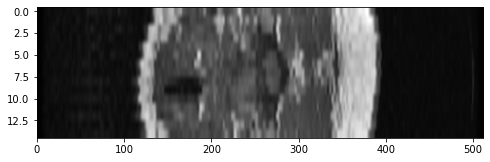

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(mri[:, 300, :], cmap="gray", aspect=10)

Here we can see the patient's wind-pipe as a dark circle on the left side of the image, and a cross-section of their spine in the middle. Or if we wanted to move up a little ways:

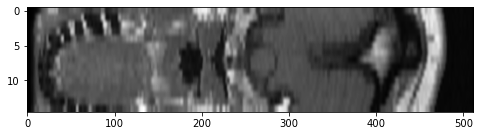

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(mri[:, 100, :], cmap="gray", aspect=8)

We can see the patient's upper jaw on the left, the top of their spine in the middle, and the lower portion of their brain (their cerebellum) on the right. 

If that feels a little abstract, consider this illustration of what we just did. We start with our image that shows the patient's full skull and neck from the side (`mri[14, :, :]`), then overlay it with the horizontal slices we pulled above:

![mri cross sections](images/mri.png)




Of course, scientists don't just use this type of volumetric data to organize a collection of two-dimensional images—they also use it to analyze inherently three-dimensional spatial patterns in data, such as the paths that blood vessels or nerves follow through the body, or spatial correlations in different tissues properties.


### Other Uses for Arrays

As this example hopefully illustrates, the fact that arrays can organize data along an arbitrary number of dimensions is a *really* powerful idea. Here are just a few other applications for their use! 

- **Color Images:** In our last reading, we saw that black and white images can be thought of as matrices, as each cell can contain the greyscale value for a given pixel. When working with color images, however, we often work with three-dimensional arrays, where the first two dimensions are the x-y coordinates of each pixel, and the third dimension is used to differentiate between the value for red in a pixel, the value of green in a pixel, the value of blue in a pixel, and the luminance (brightness) of the pixel. 
- **Repeated measurements over time:** Just as a single survey is easily represented as a matrix, so too can repeated surveys be easily represented by making time a third dimension. This makes it easy to pull out a single wave of the survey or to pick out all the responses for a given person over time. 
- **Brain Scans:** fMRI scan the entire volume of the brain, and that volumetric data is most naturally stored in the three-dimensional array, just like the temperature data above. Obviously, not all social scientists will end up working with brain scans, but there's certainly a lot of cutting-edge work in this area!
- **3D measurements that evolve over time:** just as we can model survey data that evolves over time in three dimensions, we can also model three-dimensional volumetric data that evolves over time (e.g. not just a slice of a climate model, but its evolution) in a four-dimensional array!
- **Satellite Data:** Satellite image data usually comes in the form of sets of 2-dimensional images, where each image includes information about light intensity at a given wavelength. When these images are stacked to, say, generate a color image, or identify wavelength combinations common to certain types of pollution, flood waters, or specific crops, you get a three-dimensional array.

So yeah, high dimensional arrays are a SUPER powerful data structure, and one you shouldn't shy away.